# Movies Analyis Project

## Introduction




This project analyzes IMDB(Internet Movie Database) database and a Movie Budgets Dataset to identify what types of films perform best. 

The goal  is to provide data-driven insights  on `movie genres`, `production budgets` and `release timing`that will guide the launch of a new movie studio for our company.


## Objectives of the Project



1. Clean and prepare the movie datasets
2. Explore and visualize movie trends
3. Recommend profitable genres and strategies for the new studio


## Business Understanding

The company’s management wants to enter the movie production industry but lacks experience in identifying what types of films are most likely to succeed.

This analysis aims to support management by answering the following key business questions:

  1. Which movie genres are the most profitable and well-received by audiences?

  2. Which genres perform well despite lower production budgets?

  3. Does the timing of a movie’s release impact its box office performance?





## Data Understanding

The analysis uses 2 datasets (IMDB Database and Movie Budgets dataset)that provide complementary information about movies:

`The IMDB Database` contains:
 - Movie Basics Table: Contains movie titles, genres, and release dates.

 - Movie Ratings Table: Includes average audience ratings and number of votes for each movie.

`The Movie Budgets Dataset`:
 Provides production budgets and the revenue figures.

These datasets  will be merged to create a unified view of each movie’s genre, financial performance, audience reception, and release timing.

## Loading the data into dataframes

In [47]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import sqlite3

#### Movie Budgets Dataset

In [48]:
#Creating a movie budgets dataframe
movie_budgets = pd.read_csv("./original_data/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### The IMDB Dataset

In [49]:
import zipfile
import pandas as pd

# unzip the database
with zipfile.ZipFile('original_data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall()

# connect to the SQLite database
conn = sqlite3.connect('im.db')


In [50]:
#disable scientific notations for floats
pd.set_option('display.float_format','{:.2f}'.format)

In [51]:
query = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.genres,
    mb.start_year,
    mb.runtime_minutes,
    mr.averagerating,
    mr.numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr
    ON mb.movie_id = mr.movie_id
WHERE mb.start_year IS NOT NULL
  AND mb.genres IS NOT NULL;
"""
movie_database = pd.read_sql_query(query, conn)

#Close the connection
#conn.close()

#Display first few rows of the movies_database dataframe
movie_database.head()



,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.00,7.00,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.00,7.20,43
2,tt0069049,The Other Side of the Wind,Drama,2018,122.00,6.90,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,nan,6.10,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.00,6.50,119


### Cleaning Movie Budget Dataset

In [52]:
#check movie budget structure
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [53]:
#check for null values
# no null values are in the movie_budget dataset and all columns have data
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [54]:
#check if there is any duplicate
#no duplicates in movie_budget dataset
movie_budgets.duplicated().sum()

0

In [55]:
#change production_budget,domestic_gross and worldwide_gross to float
movie_budgets.head()
#this columns are to be converted in floats
movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','', regex=True).str.replace('$','', regex=True)
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','', regex=True).str.replace('$','', regex=True)
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].str.replace(',','', regex=True).str.replace('$','',regex=True)



movie_budgets['production_budget']=pd.to_numeric(movie_budgets['production_budget'])  
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross']) 
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])

movie_budgets['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [56]:
#change release_date to date
movie_budgets['release_date']=pd.to_datetime(movie_budgets['release_date'],dayfirst=True)
movie_budgets['release_date']=movie_budgets['release_date'].dt.strftime('%d-%m-%Y')

In [57]:
#rename column movie column to movie_title and drop id column
movie_budgets.rename(columns={'movie':'movie_title'},inplace=True)
movie_budgets.drop(columns='id',inplace=True)
movie_budgets.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,18-12-2009,Avatar,425000000,760507625,2776345279
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,07-06-2019,Dark Phoenix,350000000,42762350,149762350
3,01-05-2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,15-12-2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Cleaning Movie Database

In [58]:
#drop null values and confirm the null values don't exist
movie_database=movie_database.dropna()
movie_database.isnull().sum()

movie_id           0
primary_title      0
genres             0
start_year         0
runtime_minutes    0
averagerating      0
numvotes           0
dtype: int64

In [59]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73051
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   genres           65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [60]:
#rename primary_title to movie_tile and drop the movie_id column
movie_database.rename(columns={'primary_title':'movie_title'},inplace=True)
movie_database.drop(columns='movie_id',inplace=True)

### Merging DataFrames
Combine the two dataframes into a single dataframe to enable analysis

In [61]:
# merge movie_budgets and movie_database
merged_movies=pd.merge(movie_budgets,movie_database,on=['movie_title'],how='inner')

In [62]:
merged_movies.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,genres,start_year,runtime_minutes,averagerating,numvotes
0,18-12-2009,Avatar,425000000,760507625,2776345279,Horror,2011,93.00,6.10,43
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",2011,136.00,6.60,447624
2,07-06-2019,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",2019,113.00,6.00,24451
3,01-05-2015,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",2015,141.00,7.30,665594
4,27-04-2018,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",2018,149.00,8.50,670926


### New Feature
Generate a new feature called revenue that measures profit of each movie.This will show how each film profite based on the **production_budget** and **worldwide_gross**

In [63]:
#create profit column
merged_movies['Profit'] = merged_movies['worldwide_gross']-merged_movies['production_budget']

In [64]:
#create release month column
merged_movies['release_month'] =pd.to_datetime(merged_movies['release_date'], infer_datetime_format=True).dt.month_name()


In [65]:
#reorder the columns
merged_movies=merged_movies[['movie_title','genres','production_budget','worldwide_gross','Profit','domestic_gross','start_year',
                'release_month','release_date','runtime_minutes','averagerating','numvotes']]

In [66]:
merged_movies.head()

,movie_title,genres,production_budget,worldwide_gross,Profit,domestic_gross,start_year,release_month,release_date,runtime_minutes,averagerating,numvotes
0,Avatar,Horror,425000000,2776345279,2351345279,760507625,2011,December,18-12-2009,93.00,6.10,43
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000,1045663875,635063875,241063875,2011,May,20-05-2011,136.00,6.60,447624
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000,149762350,-200237650,42762350,2019,June,07-06-2019,113.00,6.00,24451
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000,1403013963,1072413963,459005868,2015,May,01-05-2015,141.00,7.30,665594
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000,2048134200,1748134200,678815482,2018,April,27-04-2018,149.00,8.50,670926


In [67]:
#save the clean data into a csv file
merged_movies.to_csv('merged_movies.csv',index=False)

# PROFIT-RATINGS ANALYSIS


Having generated the Revenue(ROI) received from the movies we analysed, we will now compare that across different genres to see the most profitable ones. 

This will help us answer our first business question:

Q1 - Which movie genres are the most profitable and well-received by audiences?

Going by mean revenue, Adventure and Fantasy are the highest performers overally, with Adventure,Drama,Sport and Fantasy,Romance being top pairings. Action,Adventure,Sci-Fi also performs well as a pairing with a high mean and count.

Drama, Documentary and Comedy are the most produced genres. Comedy is also a popular genre.



In [68]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
# Grouping the data by genre and calculating the mean and median revenue
genre_profit = merged_movies[['genres', 'Profit']].groupby('genres').agg(['count', 'mean', 'median'])

In [70]:
#grouping by count and revenue
genre_profit.sort_values(by=('Profit','count'),ascending=False).head(11)

Profit                          
                            count         mean       median
genres                                                     
Drama                         286  23737192.41     86058.50
Documentary                   118  31452832.32   1660912.00
Comedy                         99  37341184.83   9907746.00
Comedy,Drama                   91  25987971.85   3478400.00
Comedy,Drama,Romance           75  21882227.40   3672318.00
Drama,Romance                  74  34858984.26  10413276.50
Adventure,Animation,Comedy     73 278728221.19 159517956.00
Horror                         59  85704995.54   5139730.00
Action,Adventure,Sci-Fi        58 438519862.33 335625934.50
Comedy,Romance                 58  48757757.62  13810330.50
Action,Crime,Drama             56  26385174.55   6852344.50

In [71]:
#groupig by mean and revenue
genre_profit.sort_values(by=('Profit','mean'),ascending=False).head(11)

Profit                            
                               count          mean        median
genres                                                          
Adventure,Drama,Sport              1 1122469910.00 1122469910.00
Fantasy,Romance                    1 1122469910.00 1122469910.00
Family,Fantasy,Musical             2  843815419.00  843815419.00
Adventure,Fantasy                  3  469544026.33  695577621.00
Action,Adventure,Sci-Fi           58  438519862.33  335625934.50
Fantasy,Musical                    2  411245555.00  411245555.00
Drama,Family,Fantasy               2  350121384.00  350121384.00
Adventure,Drama,Sci-Fi             3  343550272.67  501379375.00
Biography,Documentary,History      2  339658235.50  339658235.50
Crime,Fantasy,Thriller             1  333620129.00  333620129.00
Action,Adventure,Animation        17  322257606.47  377599142.00

In [72]:
#grouping by median and revenue
genre_profit.sort_values(by=('Profit','median'),ascending=False).head(11)

Profit                            
                               count          mean        median
genres                                                          
Fantasy,Romance                    1 1122469910.00 1122469910.00
Adventure,Drama,Sport              1 1122469910.00 1122469910.00
Family,Fantasy,Musical             2  843815419.00  843815419.00
Adventure,Fantasy                  3  469544026.33  695577621.00
Adventure,Drama,Sci-Fi             3  343550272.67  501379375.00
Fantasy,Musical                    2  411245555.00  411245555.00
Action,Adventure,Animation        17  322257606.47  377599142.00
Drama,Family,Fantasy               2  350121384.00  350121384.00
Animation,Comedy,Family            6  291988257.83  341503055.00
Biography,Documentary,History      2  339658235.50  339658235.50
Action,Adventure,Sci-Fi           58  438519862.33  335625934.50

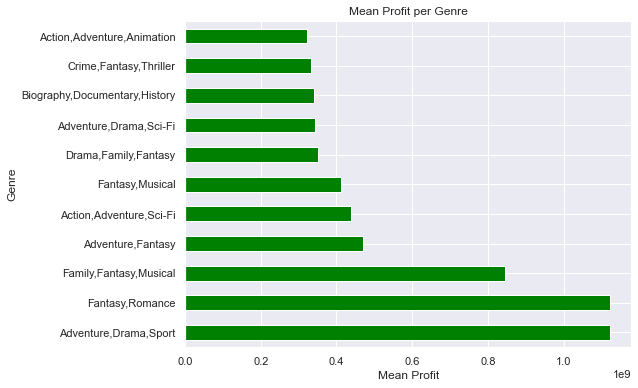

In [73]:
#plotting a graph of the mean revenue by genre
fig, ax = plt.subplots(figsize=(6, 6))
mean_genre_profit = genre_profit.sort_values(by=('Profit','mean'),ascending=False).head(11)

ax = mean_genre_profit['Profit']['mean'].plot(kind='barh', figsize=(8, 6), color='green')

ax.set_title('Mean Profit per Genre')
ax.set_xlabel('Mean Profit')
ax.set_ylabel('Genre')
plt.show();

# PRODUCTION COST ANALYSIS


We will analyse the data to check for low cost genres that still perform well overally, in case budget constraints are a factor.

This will help us answer the second business question:

Q2 - Which genres perform well despite lower production budgets?

We have used a scatter plot to establish the genres that have both a low cost of production and high ratings.

Crime,Documentary , Documentary,Drama,History and Crime,Documentary,History are examples of such.

In [74]:
#GROUPING THE DATASET BY GENRE AND PRODUCTION COST
genre_cost = merged_movies[['genres', 'production_budget','averagerating']].groupby('genres').agg('mean')


genre_cost

,production_budget,averagerating
genres,,
Action,34171428.57,5.79
"Action,Adventure",9250000.00,6.35
"Action,Adventure,Animation",115147058.82,7.43
"Action,Adventure,Biography",71000000.00,7.12
"Action,Adventure,Comedy",80233333.33,6.31
...,...,...
"Sci-Fi,Thriller",18804000.00,5.26
Sport,19000000.00,7.90
Thriller,27715813.24,5.37


In [75]:
#sorting the grouping by production budget(least costly), accessing only genres rated above 7
genre_cost[genre_cost['averagerating']>7].sort_values(by=('production_budget'),ascending = False).tail(11)

,production_budget,averagerating
genres,,
"Biography,Comedy,Documentary",9000000.00,7.70
"Biography,Family,Sport",9000000.00,7.20
"Drama,Family,Thriller",8000000.00,7.20
"Documentary,Sport,Thriller",6000000.00,7.90
"Drama,Musical",3550000.00,7.05
"Crime,Documentary,History",3000000.00,8.20
"Documentary,Drama,History",1700000.00,8.10
"Crime,Documentary",1500000.00,8.25
"Documentary,History,War",1500000.00,7.60


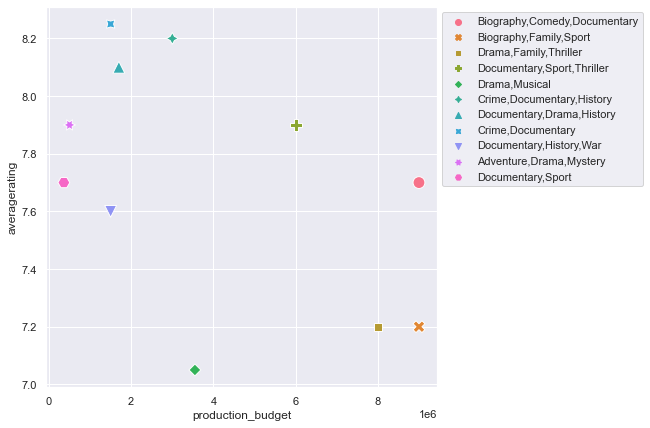

In [76]:

#plotting the lowest cost budgets that had great overall ratings
sum_per_genre = genre_cost[genre_cost['averagerating']>7].sort_values(by=('production_budget'),ascending = False).tail(11)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.scatterplot(data=sum_per_genre, x='production_budget',y='averagerating', hue='genres',s=140, style='genres',ax=ax)

ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

# RELEASE DATE IMPACT

We want to establish a possible relationship between the release date of a movie and its overall performance.

This will help us answer the third business question.

Q3 - Does the timing of a movie’s release impact its box office performance?

November, June, May and July registered the highest profit returns.


In [77]:
#grouping the data into revenue and release month
monthly_profit =  merged_movies[['release_month', 'Profit']].groupby('release_month').agg(['count', 'mean', 'median'])
monthly_profit

Profit                         
               count         mean      median
release_month                                
April            237  60800260.43  6594052.00
August           227  38520222.29  8462398.00
December         349  61658058.39  7859167.00
February         194  56789089.46 10924950.00
January          175  44327315.02 13618920.00
July             207  98462000.83 19686769.00
June             224 123256170.08 12372058.00
March            230  82239133.20  9650073.50
May              182 104599760.92 12910002.00
November         228 109668086.31 26460426.00
October          263  39359116.10  2746453.00
September        236  29379954.72  1967723.50

In [78]:
#sort by mean

monthly_profit.sort_values(by=('Profit','mean'), ascending=False)

Profit                         
               count         mean      median
release_month                                
June             224 123256170.08 12372058.00
November         228 109668086.31 26460426.00
May              182 104599760.92 12910002.00
July             207  98462000.83 19686769.00
March            230  82239133.20  9650073.50
December         349  61658058.39  7859167.00
April            237  60800260.43  6594052.00
February         194  56789089.46 10924950.00
January          175  44327315.02 13618920.00
October          263  39359116.10  2746453.00
August           227  38520222.29  8462398.00
September        236  29379954.72  1967723.50

In [79]:
#sort by median
monthly_profit.sort_values(by=('Profit','median'),ascending=False)

Profit                         
               count         mean      median
release_month                                
November         228 109668086.31 26460426.00
July             207  98462000.83 19686769.00
January          175  44327315.02 13618920.00
May              182 104599760.92 12910002.00
June             224 123256170.08 12372058.00
February         194  56789089.46 10924950.00
March            230  82239133.20  9650073.50
August           227  38520222.29  8462398.00
December         349  61658058.39  7859167.00
April            237  60800260.43  6594052.00
October          263  39359116.10  2746453.00
September        236  29379954.72  1967723.50

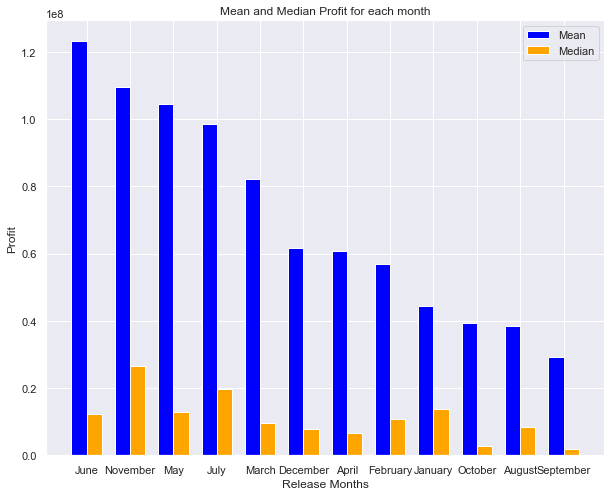

In [80]:
#set the bar width 
bar_width = 0.35

#data
mean_monthly_profit = monthly_profit.sort_values(by=('Profit','mean'), ascending=False)
# Create the plot
plt.figure(figsize=(10, 8))
index = np.arange(len(mean_monthly_profit))

# Plot the mean bars
plt.bar(index, mean_monthly_profit['Profit']['mean'], bar_width, label='Mean', color='blue')

# Plot the median bars
plt.bar(index + bar_width,mean_monthly_profit['Profit']['median'], bar_width, label='Median', color='orange')

# Set the title
plt.title('Mean and Median Profit for each month')
# Set the x-axis labels
plt.xlabel('Release Months')
plt.xticks(index + bar_width / 2, mean_monthly_profit.index)

# Set the y-axis label
plt.ylabel('Profit')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# DATA VISUALISATION: FINDINGS AND RECOMMENDATION

# Question 1: Which movie genre are the most profitable and well-received by audience?

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('merged_movies.csv')

# Movies with rating 7 and above
high_rated_movies = df[df['averagerating'] >= 7]

high_rated_movies.head()

# group by genre and calculate profitability

genre_profit = (
    high_rated_movies
    .groupby('genres')['Profit']
    .mean()
    .sort_values(ascending=False)
)

genre_profit



genres
Action,Adventure,Thriller     910526981.00
Family,Fantasy,Musical        843815419.00
Adventure,Fantasy             702972238.00
Adventure,Family,Fantasy      694703210.50
Family                        679235992.00
                                  ...     
Biography,Crime,Documentary   -18296719.00
Biography,Drama,Mystery       -19772767.00
Action,Sport                  -21213248.00
Adventure,Drama,History       -22773374.00
Animation,Sci-Fi              -29689015.00
Name: Profit, Length: 180, dtype: float64

In [82]:
# top 10 most profitable genres

top_genre_profit = genre_profit.head(10)

top_genre_profit

genres
Action,Adventure,Thriller   910526981.00
Family,Fantasy,Musical      843815419.00
Adventure,Fantasy           702972238.00
Adventure,Family,Fantasy    694703210.50
Family                      679235992.00
Action,Adventure,Sci-Fi     629752721.75
Action,Adventure,Family     578536735.00
Adventure,Drama,Sci-Fi      524325409.00
Action,Adventure,Fantasy    517382109.80
Action,Adventure,Comedy     499987213.60
Name: Profit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

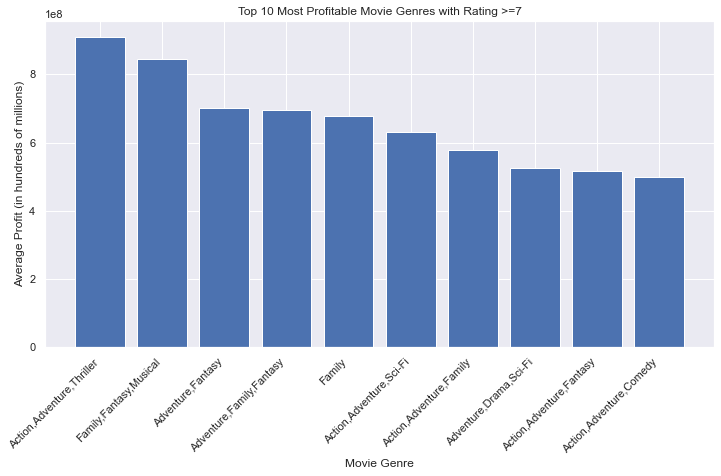

In [83]:
# creating a barchart

plt.figure(figsize=(12,6))
plt.bar(top_genre_profit.index, top_genre_profit.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Genre')
plt.ylabel('Average Profit (in hundreds of millions)')
plt.title('Top 10 Most Profitable Movie Genres with Rating >=7')
plt.show

In [84]:
print('\n KEY FINDINGS AND RECOMMENDATIONS')

print('\n1 - FINDINGS')
print('* Action-Adventure-Thriller leads profitability: This combination tops the list with $911M average profit among movies rated >=7, driven by broad appeal and potential.')
print('* Family-Fantasy-Musical ranks second: Achieves $844M average profit, highlighting the strong commercial success of uplifting, family-friendly content with musical elements.')
print('* Adventure dominates top performers: Appears in 8 of the top 10 genre combinations, serving as a key driver of high profits through escapism and excitement.')
print('* Sci-Fi boosts profits: Combinations like Action-Adventure-Sci-Fi (approximately $630M) and Adventure-Drama-Sci-Fi (approximately $524M) show speculative elements enhance financial returns when paired with strong narratives.')

print('\n2 - RECOMMENDATIONS')
print('* Prioritize Action-Adventure-Thriller projects: Focus research, development and marketing resources in order to maximize returns on high-rated films.')
print('* Increase investment in Family-Fantasy-Musicals: Develop more animated and musicals with fantasy themes to capture family audiences.')
print('* Build films around Adventure cores: Combine Adventure with Family, Sci-Fi, or Fantasy elements to broaden appeal and boost profitability.')
print('* Strategically integrate Sci-Fi: Adding visual effects elements to Action or Drama-Adventure films while managing budgets for stronger commercial outcomes.')


 KEY FINDINGS AND RECOMMENDATIONS

1 - FINDINGS
* Action-Adventure-Thriller leads profitability: This combination tops the list with $911M average profit among movies rated >=7, driven by broad appeal and potential.
* Family-Fantasy-Musical ranks second: Achieves $844M average profit, highlighting the strong commercial success of uplifting, family-friendly content with musical elements.
* Adventure dominates top performers: Appears in 8 of the top 10 genre combinations, serving as a key driver of high profits through escapism and excitement.
* Sci-Fi boosts profits: Combinations like Action-Adventure-Sci-Fi (approximately $630M) and Adventure-Drama-Sci-Fi (approximately $524M) show speculative elements enhance financial returns when paired with strong narratives.

2 - RECOMMENDATIONS
* Prioritize Action-Adventure-Thriller projects: Focus research, development and marketing resources in order to maximize returns on high-rated films.
* Increase investment in Family-Fantasy-Musicals: Dev

# Question 2: Which genres perform well despite lower production cost?

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

df = pd.read_csv("merged_movies.csv")

# Handling multiple genres per movie

df['genres'] = df['genres'].str.split('|')

df = df.explode('genres')

# Filtering movies based on high ratings of >= 7

high_rated_movies = df[df['averagerating'] >= 7]

high_rated_movies = high_rated_movies.sort_values(by='averagerating', ascending=False)

genre_performance = (
    high_rated_movies
    .groupby('genres')
    .agg(
        Average_Budget=('production_budget', 'mean'),
        Average_Rating=('averagerating', 'mean'),
        Movie_Count =('averagerating', 'count')
        
    )
    .sort_values('Average_Budget')
)

genre_performance = genre_performance.reset_index(
    
)
filtered_genres = genre_performance[
    (genre_performance['Average_Rating'] >= 7) &
    (genre_performance['Movie_Count'] >= 10)
]

# Top 10 genres with the lowest average budget

top10_low_budget_genres = filtered_genres.sort_values('Average_Budget').head(10)

top10_low_budget_genres = top10_low_budget_genres.round(2)





<function matplotlib.pyplot.show(close=None, block=None)>

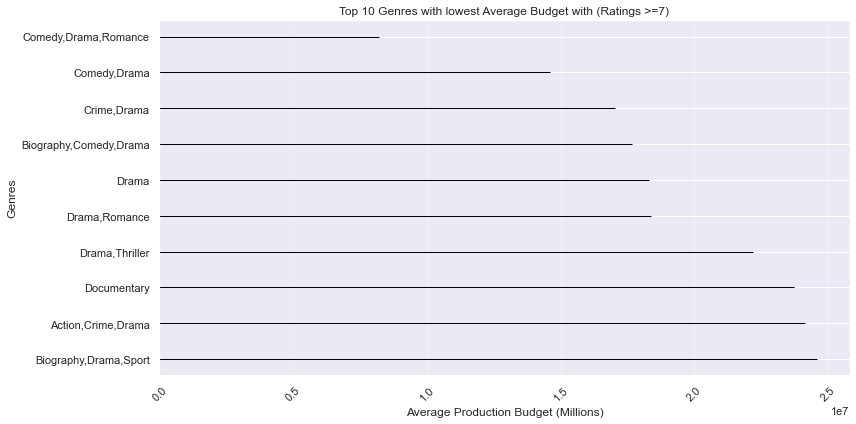

In [86]:
# Plotting a bar chart showing low Budget and High Rating Genres

plt.figure(figsize=(12,6))
bars = plt.barh(
    top10_low_budget_genres['genres'],
    top10_low_budget_genres['Average_Budget'] / 1,000,000,
    color= 'navy',
    edgecolor= 'black'
  
)

plt.xlabel('Average Production Budget (Millions)')
plt.ylabel('Genres')
plt.title('Top 10 Genres with lowest Average Budget with (Ratings >=7)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show


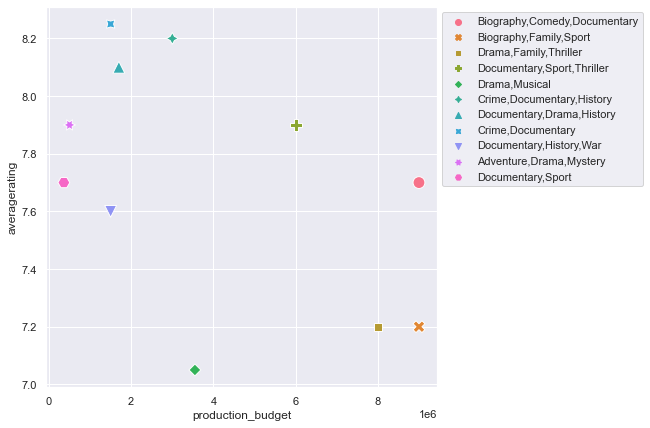

In [87]:
#plotting the lowest cost budgets that had great overall ratings

ax.set_title('Top 10 Genres with lowest Average Budget with (Ratings >=7)')

sum_per_genre = genre_cost[genre_cost['averagerating']>7].sort_values(by=('production_budget'),ascending = False).tail(11)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.scatterplot(data=sum_per_genre, x='production_budget',y='averagerating', hue='genres',s=140, style='genres',ax=ax)

ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

In [88]:
print('\n KEY FINDINGS AND RECOMMENDATIONS')

print('\n1 - FINDINGS')
print('* Documentary-based genres consistently achieve high ratings at very low budgets. From both visualizations, genres involving Documentary such as Documentary, Documentary–Sport, Crime–Documentary, and Documentary–History appear at the lowest end of the production budget axis while maintaining ratings well above 7.5.')
print('* Drama combinations perform strongly even with modest budgets. Genres such as Drama, Drama–Romance, Drama–Thriller, and Crime–Drama appear among the genres with lower average production budgets while still achieving ratings between 7.5 and 8.0.')
print('* Biographical films receive high audience approval without excessive spending. This indicates that audiences value real-life stories and inspirational narratives more than visual spectacle.')
print('* Higher production budgets do not guarantee higher ratings. This demonstrates that increasing spending does not automatically lead to better audience reception.')

print('\n2 - RECOMMENDATIONS')
print('* Increase investment in documentary and documentary-hybrid genres')
print('* Use drama as a foundation genre for low-budget productions')
print('* Avoid over-investing in production budgets to achieve higher ratings. Since higher budgets do not necessarily lead to better ratings, studios should set strategic budget limits and focus more on script quality')
print('* Encourage multi-genre storytelling to broaden audience appeal. Combining genres allows films to attract diverse audience segments without significantly increasing costs.')
   


 KEY FINDINGS AND RECOMMENDATIONS

1 - FINDINGS
* Documentary-based genres consistently achieve high ratings at very low budgets. From both visualizations, genres involving Documentary such as Documentary, Documentary–Sport, Crime–Documentary, and Documentary–History appear at the lowest end of the production budget axis while maintaining ratings well above 7.5.
* Drama combinations perform strongly even with modest budgets. Genres such as Drama, Drama–Romance, Drama–Thriller, and Crime–Drama appear among the genres with lower average production budgets while still achieving ratings between 7.5 and 8.0.
* Biographical films receive high audience approval without excessive spending. This indicates that audiences value real-life stories and inspirational narratives more than visual spectacle.
* Higher production budgets do not guarantee higher ratings. This demonstrates that increasing spending does not automatically lead to better audience reception.

2 - RECOMMENDATIONS
* Increase inv

# Q3 Does the date of release affect the popularity of a movie?


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('merged_movies.csv')

# Clean up the truncated last row
df = df[~df['movie_title'].isna()]
df = df[df['movie_title'] != 'The Face']

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%m-%Y', errors='coerce')

# Extract month and season from release date
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter
df['release_year'] = df['release_date'].dt.year

# Create season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

df['release_season'] = df['release_month'].apply(get_season)

# Calculate ROI (Return on Investment)
df['roi'] = (df['Profit'] / df['production_budget']) * 100

# Filter out extreme outliers for better visualization
df_clean = df[(df['production_budget'] > 0) & (df['Profit'] > -1000000000) & (df['Profit'] < 3000000000)]

print(f"Total movies analyzed: {len(df_clean)}")
print(f"Date range: {df_clean['release_date'].min()} to {df_clean['release_date'].max()}")

Total movies analyzed: 2752
Date range: 1915-02-08 00:00:00 to 2019-12-31 00:00:00


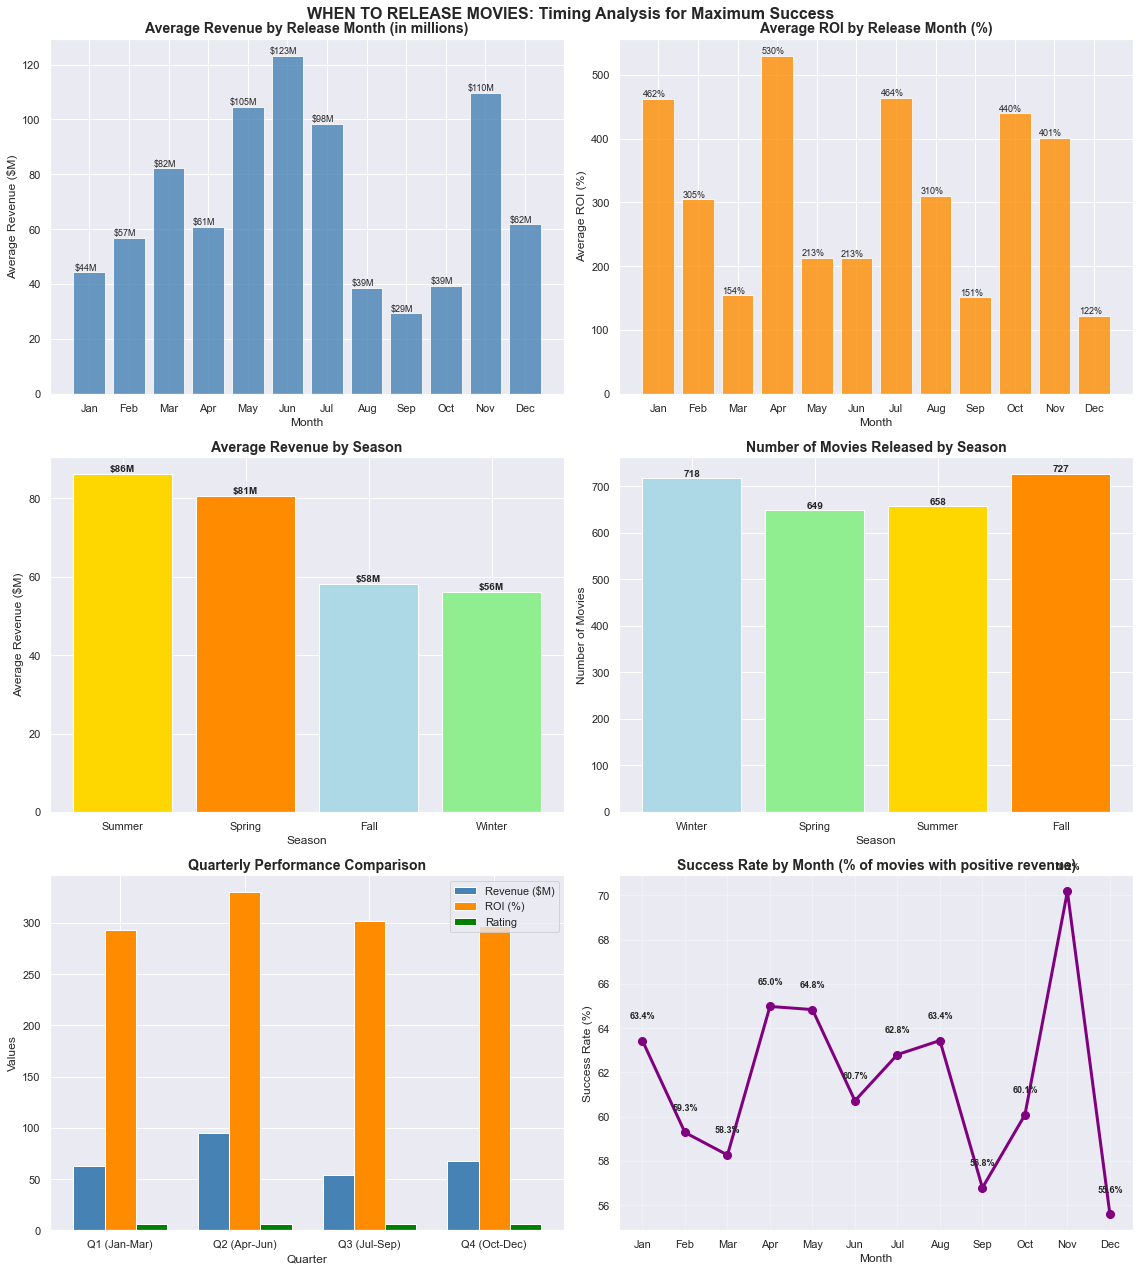

In [90]:
# Set style
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('WHEN TO RELEASE MOVIES: Timing Analysis for Maximum Success', fontsize=16, fontweight='bold')

# 1. MONTHLY PERFORMANCE - Average Revenue
monthly_performance = df_clean.groupby('release_month').agg({
    'Profit': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()
monthly_performance.columns = ['month', 'avg_revenue', 'avg_roi', 'avg_rating', 'movie_count']

# Sort by month
monthly_performance = monthly_performance.sort_values('month')

# Plot 1: Average Revenue by Month
axes[0, 0].bar(monthly_performance['month'], monthly_performance['avg_revenue']/1e6, 
               color='steelblue', alpha=0.8)
axes[0, 0].set_title('Average Revenue by Release Month (in millions)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Revenue ($M)')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, v in enumerate(monthly_performance['avg_revenue']/1e6):
    axes[0, 0].text(i+0.9, v, f'${v:,.0f}M', ha='center', va='bottom', fontsize=9)

# Plot 2: Average ROI by Month
axes[0, 1].bar(monthly_performance['month'], monthly_performance['avg_roi'], 
               color='darkorange', alpha=0.8)
axes[0, 1].set_title('Average ROI by Release Month (%)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average ROI (%)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, v in enumerate(monthly_performance['avg_roi']):
    axes[0, 1].text(i+0.9, v, f'{v:.0f}%', ha='center', va='bottom', fontsize=9)

# 2. SEASONAL PERFORMANCE
seasonal_performance = df_clean.groupby('release_season').agg({
    'Profit': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()
seasonal_performance = seasonal_performance.sort_values('Profit', ascending=False)

# Plot 3: Average Revenue by Season
axes[1, 0].bar(seasonal_performance['release_season'], seasonal_performance['Profit']/1e6, 
               color=['gold', 'darkorange', 'lightblue', 'lightgreen'])
axes[1, 0].set_title('Average Revenue by Season', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Average Revenue ($M)')
for i, v in enumerate(seasonal_performance['Profit']/1e6):
    axes[1, 0].text(i, v, f'${v:,.0f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Movie Count by Season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = df_clean['release_season'].value_counts().reindex(season_order)
colors = ['lightblue', 'lightgreen', 'gold', 'darkorange']
axes[1, 1].bar(season_counts.index, season_counts.values, color=colors)
axes[1, 1].set_title('Number of Movies Released by Season', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Number of Movies')
for i, v in enumerate(season_counts.values):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. QUARTERLY PERFORMANCE
quarterly_performance = df_clean.groupby('release_quarter').agg({
    'Profit': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()

# Plot 5: Quarterly Performance Comparison
quarters = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
x = np.arange(len(quarters))
width = 0.25

ax5 = axes[2, 0]
bars1 = ax5.bar(x - width, quarterly_performance['Profit']/1e6, width, 
                label='Revenue ($M)', color='steelblue')
bars2 = ax5.bar(x, quarterly_performance['roi'], width, 
                label='ROI (%)', color='darkorange')
bars3 = ax5.bar(x + width, quarterly_performance['averagerating'], width, 
                label='Rating', color='green')

ax5.set_title('Quarterly Performance Comparison', fontsize=14, fontweight='bold')
ax5.set_xlabel('Quarter')
ax5.set_ylabel('Values')
ax5.set_xticks(x)
ax5.set_xticklabels(quarters)
ax5.legend()

# Plot 6: Success Rate by Month (Percentage of movies with positive revenue)
success_by_month = df_clean.groupby('release_month').apply(
    lambda x: (x['Profit'] > 0).sum() / len(x) * 100
).reset_index()
success_by_month.columns = ['month', 'success_rate']

axes[2, 1].plot(success_by_month['month'], success_by_month['success_rate'], 
                marker='o', linewidth=3, color='purple', markersize=8)
axes[2, 1].set_title('Success Rate by Month (% of movies with positive revenue)', 
                     fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Success Rate (%)')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2, 1].grid(True, alpha=0.3)

# Add success rate labels
for i, (month, rate) in enumerate(zip(success_by_month['month'], success_by_month['success_rate'])):
    axes[2, 1].text(month, rate+1, f'{rate:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [91]:
# Find top performing months
top_months = monthly_performance.nlargest(3, 'avg_revenue')
worst_months = monthly_performance.nsmallest(3, 'avg_revenue')

# Find top performing seasons
top_seasons = seasonal_performance.nlargest(2, 'Profit')
worst_seasons = seasonal_performance.nsmallest(2, 'Profit')

print("WHEN SHOULD WE RELEASE? KEY FINDINGS:")

print(f"\n TOP 3 MONTHS FOR AVERAGE REVENUE:")
for idx, row in top_months.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(row['month'])-1]
    print(f"  • {month_name}: ${row['avg_revenue']/1e6:,.1f}M average revenue | {row['avg_roi']:.0f}% ROI")

print(f"\n WORST 3 MONTHS FOR AVERAGE REVENUE:")
for idx, row in worst_months.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(row['month'])-1]
    print(f"  • {month_name}: ${row['avg_revenue']/1e6:,.1f}M average revenue | {row['avg_roi']:.0f}% ROI")

print(f"\n BEST SEASONS FOR RELEASE:")
for idx, row in top_seasons.iterrows():
    print(f"  • {row['release_season']}: ${row['Profit']/1e6:,.1f}M average revenue")

print(f"\n WORST SEASONS FOR RELEASE:")
for idx, row in worst_seasons.iterrows():
    print(f"  • {row['release_season']}: ${row['Profit']/1e6:,.1f}M average revenue")

# Analyze success rate
print(f"\n SUCCESS RATE ANALYSIS:")
best_success_month = success_by_month.loc[success_by_month['success_rate'].idxmax()]
worst_success_month = success_by_month.loc[success_by_month['success_rate'].idxmin()]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"  • Highest success rate: {month_names[int(best_success_month['month'])-1]} ({best_success_month['success_rate']:.1f}% of movies profitable)")
print(f"  • Lowest success rate: {month_names[int(worst_success_month['month'])-1]} ({worst_success_month['success_rate']:.1f}% of movies profitable)")

# Analyze blockbuster timing
high_budget = df_clean[df_clean['production_budget'] > 100000000]  # > $100M budget
if len(high_budget) > 0:
    high_budget_timing = high_budget.groupby('release_month').agg({
        'Profit': 'mean',
        'roi': 'mean',
        'movie_title': 'count'
    }).reset_index()
    
    if len(high_budget_timing) > 0:
        best_big_budget_month = high_budget_timing.loc[high_budget_timing['Profit'].idxmax()]
        month_name = month_names[int(best_big_budget_month['release_month'])-1]
        print(f"\n HIGH-BUDGET MOVIES (>$100M):")
        print(f"  • Best month for big budgets: {month_name} (${best_big_budget_month['Profit']/1e6:,.1f}M average revenue)")

WHEN SHOULD WE RELEASE? KEY FINDINGS:

 TOP 3 MONTHS FOR AVERAGE REVENUE:
  • Jun: $123.3M average revenue | 213% ROI
  • Nov: $109.7M average revenue | 401% ROI
  • May: $104.6M average revenue | 213% ROI

 WORST 3 MONTHS FOR AVERAGE REVENUE:
  • Sep: $29.4M average revenue | 151% ROI
  • Aug: $38.5M average revenue | 310% ROI
  • Oct: $39.4M average revenue | 440% ROI

 BEST SEASONS FOR RELEASE:
  • Summer: $86.2M average revenue
  • Spring: $80.7M average revenue

 WORST SEASONS FOR RELEASE:
  • Winter: $56.1M average revenue
  • Fall: $58.2M average revenue

 SUCCESS RATE ANALYSIS:
  • Highest success rate: Nov (70.2% of movies profitable)
  • Lowest success rate: Dec (55.6% of movies profitable)

 HIGH-BUDGET MOVIES (>$100M):
  • Best month for big budgets: Apr ($618.4M average revenue)


In [92]:
# Release Recommendations for the Head of Studio
print("\n")
print("OPTIMUM RELEASE WINDOWS FOR MAX PERFORMANCE")
print("\n")

print("\n1. MAXIMUM GROSS REVENUE")
print("   • PRIME WINDOW: May & June (Summer Peak)")
print("     - June leads with $123.3M average revenue per film.")
print("     - School is out and 'vacation spending' is at its annual peak.")
print("     - Reserve this for your highest-budget ($100M+) visual spectacles.")
print("     - Success here requires a massive marketing to beat competitors.")

print("\n2. HIGHEST PROFIT MARGINS (ROI)")
print("   • PRIME WINDOW: October & November")
print("    - October ROI hits 440%; November boasts a 70.2% success rate.")
print("    - October is fueled by low-budget Horror fans (Halloween).")
print("    - November captures the 'Family Thanksgiving' and 'Award Season' crowds.")
print("    - Launch mid-budget dramas in Nov and low-budget Horror in Oct.")
print("    - This maximizes profit with significantly less financial risk.")

print("\n3. HIGH-BUDGET OPPORTUNITY")
print("   • PRIME WINDOW: April")
print("    - Big-budget movies (>$100M) average $618.4M in revenue here.")
print("    - It's the 'Early Summer' slot. You capture the audience's hunger for")
print("      blockbusters before the June/July market becomes oversaturated.")
print("    - If you have a high-confidence 'Tentpole' film, release in April to")
print("      own the market before the 'Summer Wars' begin.")

print("\n4. RISK MITIGATION")
print("   • AVOID WINDOW: September & January")
print("    - September is the weakest month ($29.4M avg revenue).")
print("    - Sept. is 'Back-to-School' (no time); Jan. is 'Holiday Hangover' (no money).")
print("    - Do not launch original IP or high-priority films here. Use these")
print("      months only for experimental films or contractual 'dumping'.")

print("\n FINAL SUMMARY")
print("   - For GROSS:   Invest heavily in June/May.")
print("   - For PROFIT:  Go Targeted in October/November.")
print("   - For SAFETY:  Early release in April.")
print("\n")



OPTIMUM RELEASE WINDOWS FOR MAX PERFORMANCE



1. MAXIMUM GROSS REVENUE
   • PRIME WINDOW: May & June (Summer Peak)
     - June leads with $123.3M average revenue per film.
     - School is out and 'vacation spending' is at its annual peak.
     - Reserve this for your highest-budget ($100M+) visual spectacles.
     - Success here requires a massive marketing to beat competitors.

2. HIGHEST PROFIT MARGINS (ROI)
   • PRIME WINDOW: October & November
    - October ROI hits 440%; November boasts a 70.2% success rate.
    - October is fueled by low-budget Horror fans (Halloween).
    - November captures the 'Family Thanksgiving' and 'Award Season' crowds.
    - Launch mid-budget dramas in Nov and low-budget Horror in Oct.
    - This maximizes profit with significantly less financial risk.

3. HIGH-BUDGET OPPORTUNITY
   • PRIME WINDOW: April
    - Big-budget movies (>$100M) average $618.4M in revenue here.
    - It's the 'Early Summer' slot. You capture the audience's hunger for
      bl

**PROBLEM STATEMENT**

What genre/category of movies has low production-cost while being rated highly by the audience.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [3]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Group1_Movies_Analysis_Project\merged_movies.csv')
df

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,1.045664e+09,6.350639e+08,241063875.0,2011,20-05-2011,136.0,6.6,447624
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000.0,1.497624e+08,-2.002376e+08,42762350.0,2019,07-06-2019,113.0,6.0,24451
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,1.403014e+09,1.072414e+09,459005868.0,2015,01-05-2015,141.0,7.3,665594
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...
2747,Stories of Our Lives,Drama,15000.0,0.000000e+00,-1.500000e+04,0.0,2014,31-12-2014,60.0,7.5,85
2748,Cure,Drama,10000.0,9.459600e+04,8.459600e+04,94596.0,2011,06-07-2001,93.0,4.9,11
2749,Newlyweds,"Comedy,Drama",9000.0,4.584000e+03,-4.416000e+03,4584.0,2011,13-01-2012,95.0,6.4,1436
2750,Red 11,"Horror,Sci-Fi,Thriller",7000.0,0.000000e+00,-7.000000e+03,0.0,2019,31-12-2018,77.0,5.6,43


In [4]:
df.columns

Index(['movie_title', 'genres', 'production_budget', 'worldwide_gross',
       'Revenue', 'domestic_gross', 'start_year', 'release_date',
       'runtime_minutes', 'averagerating', 'numvotes'],
      dtype='object')

In [5]:
#Absolute profit - to identify movies that made most raw money in currency
# > 0 ...Profit
# 0 ....Even
# < 0 ... Loss
df['absolute_profit'] = df['Revenue'] -  df ['production_budget']
df['absolute_profit']

0       1.926345e+09
1       2.244639e+08
2      -5.502376e+08
3       7.418140e+08
4       1.448134e+09
            ...     
2747   -3.000000e+04
2748    7.459600e+04
2749   -1.341600e+04
2750   -1.400000e+04
2751   -2.800000e+03
Name: absolute_profit, Length: 2752, dtype: float64

In [6]:
# profit_margin = To identify how much relative return was (how much was earned many times the budget)
df['profit_margin'] = (df['Revenue'] - df['production_budget'])/df['production_budget']
df['profit_margin']

0       4.532577
1       0.546673
2      -1.572108
3       2.243841
4       4.827114
          ...   
2747   -2.000000
2748    7.459600
2749   -1.490667
2750   -2.000000
2751   -2.000000
Name: profit_margin, Length: 2752, dtype: float64

In [7]:
print(df[['movie_title','genres','production_budget','absolute_profit','profit_margin']].head())

                                   movie_title                    genres  \
0                                       Avatar                    Horror   
1  Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy   
2                                 Dark Phoenix   Action,Adventure,Sci-Fi   
3                      Avengers: Age of Ultron   Action,Adventure,Sci-Fi   
4                       Avengers: Infinity War   Action,Adventure,Sci-Fi   

   production_budget  absolute_profit  profit_margin  
0        425000000.0     1.926345e+09       4.532577  
1        410600000.0     2.244639e+08       0.546673  
2        350000000.0    -5.502376e+08      -1.572108  
3        330600000.0     7.418140e+08       2.243841  
4        300000000.0     1.448134e+09       4.827114  


In [11]:
# Movies with least production budget
df.sort_values(by='production_budget', ascending=True).head(10)
df

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43,1.926345e+09,4.532577
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,1.045664e+09,6.350639e+08,241063875.0,2011,20-05-2011,136.0,6.6,447624,2.244639e+08,0.546673
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000.0,1.497624e+08,-2.002376e+08,42762350.0,2019,07-06-2019,113.0,6.0,24451,-5.502376e+08,-1.572108
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,1.403014e+09,1.072414e+09,459005868.0,2015,01-05-2015,141.0,7.3,665594,7.418140e+08,2.243841
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926,1.448134e+09,4.827114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,Stories of Our Lives,Drama,15000.0,0.000000e+00,-1.500000e+04,0.0,2014,31-12-2014,60.0,7.5,85,-3.000000e+04,-2.000000
2748,Cure,Drama,10000.0,9.459600e+04,8.459600e+04,94596.0,2011,06-07-2001,93.0,4.9,11,7.459600e+04,7.459600
2749,Newlyweds,"Comedy,Drama",9000.0,4.584000e+03,-4.416000e+03,4584.0,2011,13-01-2012,95.0,6.4,1436,-1.341600e+04,-1.490667
2750,Red 11,"Horror,Sci-Fi,Thriller",7000.0,0.000000e+00,-7.000000e+03,0.0,2019,31-12-2018,77.0,5.6,43,-1.400000e+04,-2.000000


In [12]:
#filter genre with their ratings and their production budget
genre_stats = (
    df.groupby('genres')
      .agg({
          'averagerating': 'mean',
          'production_budget': 'mean'
      })
)

# Filter: rating > 7 AND budget ≤ 15 million
genre_stats = genre_stats[
    (genre_stats['averagerating'] > 7) &
    (genre_stats['production_budget'] <= 15_000_000)
]

# Sort by rating and show top 10
genre_stats.sort_values(by='averagerating', ascending=True).head(10)

,averagerating,production_budget
genres,,
"Documentary,Drama,Family",7.050000,1.450000e+07
"Drama,Musical",7.050000,3.550000e+06
"Biography,Family,Sport",7.200000,9.000000e+06
"Drama,Family,Thriller",7.200000,8.000000e+06
"Documentary,Drama",7.433333,1.251667e+07
"Documentary,History,War",7.600000,1.500000e+06
"Adventure,Documentary,History",7.650000,9.650000e+06
"Biography,Comedy,Documentary",7.700000,9.000000e+06
"Documentary,Sport",7.700000,3.625000e+05


In [8]:
#Top 10 movies with most money overall
df.sort_values(by = 'absolute_profit', ascending = False).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43,1.926345e+09,4.532577
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926,1.448134e+09,4.827114
25,Jurassic World,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,652270625.0,2015,12-06-2015,124.0,7.0,539338,1.218855e+09,5.669092
56,Furious 7,"Action,Crime,Thriller",190000000.0,1.518723e+09,1.328723e+09,353007020.0,2015,03-04-2015,137.0,7.2,335074,1.138723e+09,5.993278
19,The Avengers,"Action,Adventure,Sci-Fi",225000000.0,1.517936e+09,1.292936e+09,623279547.0,2012,04-05-2012,143.0,8.1,1183655,1.067936e+09,4.746382
425,Minions,"Adventure,Animation,Comedy",74000000.0,1.160336e+09,1.086336e+09,336045770.0,2015,10-07-2015,91.0,6.4,193917,1.012336e+09,13.680219
137,Frozen,"Adventure,Animation,Comedy",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2013,22-11-2013,102.0,7.5,516998,9.724699e+08,6.483133
136,Frozen,"Fantasy,Romance",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,92.0,5.4,75,9.724699e+08,6.483133
135,Frozen,"Adventure,Drama,Sport",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,93.0,6.2,62311,9.724699e+08,6.483133
97,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",170000000.0,1.305773e+09,1.135773e+09,417719760.0,2018,22-06-2018,128.0,6.2,219125,9.657728e+08,5.681016


In [9]:
# Top 10 movies with their  ratings
df.sort_values(by='averagerating', ascending=False).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
1826,The Runaways,Adventure,9500000.0,5278632.0,-4221368.0,3573673.0,2019,19-03-2010,108.0,9.2,47,-13721368.0,-1.444355
2252,The Wall,Documentary,3000000.0,4495262.0,1495262.0,1803064.0,2010,12-05-2017,78.0,9.2,8,-1504738.0,-0.501579
644,Traffic,Documentary,48000000.0,208300000.0,160300000.0,124107476.0,2014,27-12-2000,110.0,9.2,64,112300000.0,2.339583
676,Frankenstein,Drama,45000000.0,112006296.0,67006296.0,22006296.0,2011,04-11-1994,130.0,9.0,1832,22006296.0,0.489029
1338,Survivor,"Biography,Crime,Documentary",20000000.0,1703281.0,-18296719.0,0.0,2012,29-05-2015,81.0,9.0,45,-38296719.0,-1.914836
528,Dragonfly,"Action,Adventure,Sci-Fi",60000000.0,30063805.0,-29936195.0,30063805.0,2013,22-02-2002,75.0,9.0,5,-89936195.0,-1.498937
1578,Bobby,Drama,14000000.0,20597806.0,6597806.0,11242801.0,2018,17-11-2006,130.0,8.9,23,-7402194.0,-0.528728
1533,Dark Blue,"Crime,Drama",15000000.0,12262065.0,-2737935.0,9237470.0,2011,21-02-2003,85.0,8.9,9,-17737935.0,-1.182529
1856,Skin Trade,Documentary,9000000.0,1242.0,-8998758.0,1242.0,2010,08-05-2015,78.0,8.8,31,-17998758.0,-1.999862
1039,Serendipity,Drama,28000000.0,77477297.0,49477297.0,50255310.0,2018,05-10-2001,107.0,8.8,53,21477297.0,0.767046


In [10]:
#Top ten movies that earned many times their budget/cost
df.sort_values(by=['profit_margin', 'averagerating'], ascending=[False, False]).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
2703,The Gallows,"Horror,Mystery,Thriller",100000.0,41656474.0,41556474.0,22764410.0,2015,10-07-2015,81.0,4.2,17763,41456474.0,414.564740
2549,Bambi,"Biography,Documentary",858000.0,268000000.0,267142000.0,102797000.0,2013,13-08-1942,58.0,7.0,101,266284000.0,310.354312
2140,Night of the Living Dead,Horror,114000.0,30087064.0,29973064.0,12087064.0,2014,01-10-1968,79.0,5.3,277,29859064.0,261.921614
2484,Rocky,"Action,Comedy,Drama",1000000.0,225000000.0,224000000.0,117235147.0,2013,21-11-1976,136.0,6.1,46,223000000.0,223.000000
1491,Halloween,"Horror,Thriller",325000.0,70000000.0,69675000.0,47000000.0,2018,17-10-1978,106.0,6.6,88395,69350000.0,213.384615
2485,The Devil Inside,Horror,1000000.0,101759490.0,100759490.0,53262945.0,2012,06-01-2012,83.0,4.2,33522,99759490.0,99.759490
1744,The Birth of a Nation,"Biography,Drama,History",110000.0,11000000.0,10890000.0,10000000.0,2016,08-02-1915,120.0,6.4,18442,10780000.0,98.000000
2649,Graduation Day,Thriller,250000.0,23894000.0,23644000.0,23894000.0,2015,01-05-1981,75.0,5.0,52,23394000.0,93.576000
306,Cinderella,"Drama,Family,Fantasy",2900000.0,263591415.0,260691415.0,85000000.0,2015,15-02-1950,105.0,6.9,142792,257791415.0,88.893591
205,Home,"Drama,Romance,Thriller",500000.0,44793168.0,44293168.0,15433.0,2018,23-04-2009,71.0,8.4,32,43793168.0,87.586336


In [ ]:
#Highly rated movies
genre_rating = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
genre_rating

genres
Action,Documentary,Drama           8.700
Crime,Documentary                  8.250
Crime,Documentary,History          8.200
Documentary,Drama,History          8.100
Sport                              7.900
Documentary,Sport,Thriller         7.900
Adventure,Drama,Mystery            7.900
Adventure,Biography,Documentary    7.800
Biography,Documentary,Drama        7.725
Documentary,Sport                  7.700
Name: averagerating, dtype: float64

**VISUALIZATION AND INTERPRETATION**


1 . High-Rated Genres with Budget ≤ $15M

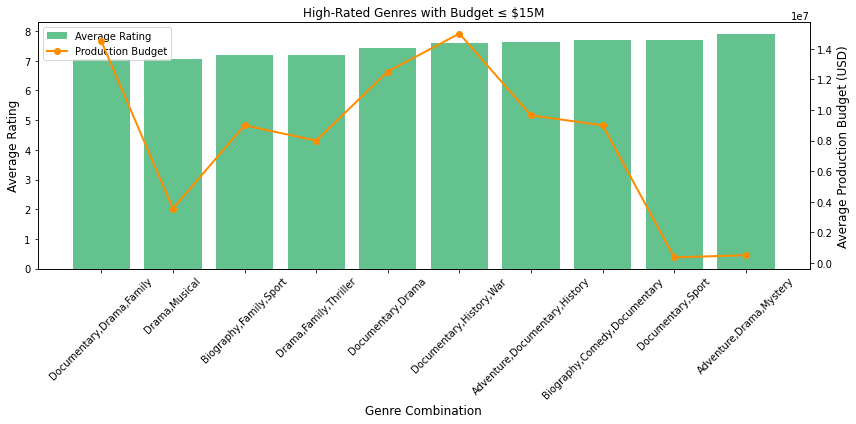

In [17]:
import matplotlib.pyplot as plt

# Data
genres = [
    'Documentary,Drama,Family',
    'Drama,Musical',
    'Biography,Family,Sport',
    'Drama,Family,Thriller',
    'Documentary,Drama',
    'Documentary,History,War',
    'Adventure,Documentary,History',
    'Biography,Comedy,Documentary',
    'Documentary,Sport',
    'Adventure,Drama,Mystery'
]

average_ratings = [7.05, 7.05, 7.2, 7.2, 7.4333, 7.6, 7.65, 7.7, 7.7, 7.9]
production_budgets = [14500000, 3550000, 9000000, 8000000, 12516666, 15000000, 9650000, 9000000, 362500, 500000]

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Ratings as bars
bars = ax1.bar(genres, average_ratings, color='mediumseagreen', alpha=0.8, label='Average Rating')
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_xlabel('Genre Combination', fontsize=12)
ax1.set_title('High-Rated Genres with Budget ≤ $15M')
ax1.tick_params(axis='x', rotation=45)

# Budgets as line (secondary axis)
ax2 = ax1.twinx()
line = ax2.plot(genres, production_budgets, color='darkorange', marker='o', linewidth=2, label='Production Budget')
ax2.set_ylabel('Average Production Budget (USD)', fontsize=12)

# Add legends for clarity
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.tight_layout()
plt.show()

 - The green bars (ratings) show consistently high audience approval/ratings across all genres.
- The orange line (budgets) highlights which genres are more affordable(low_budget)
-Adventure,drama,mystery is a strong low-cost option
- Documentary, History, War (rating 7.6, budget $15M) sits at the upper budget limit but still delivers strong ratings


2.Top 10 Genres by Profit

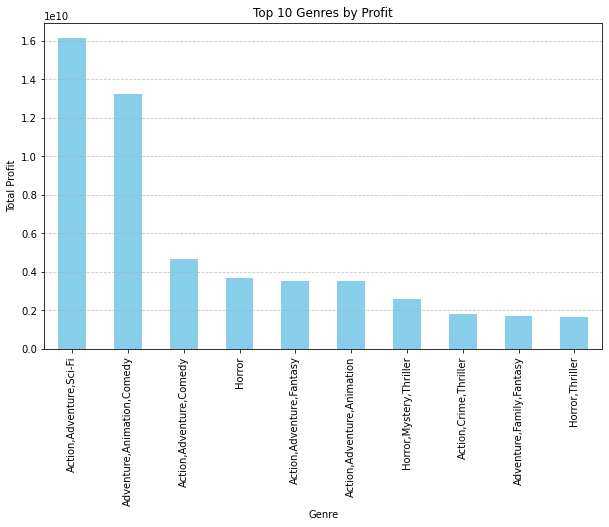

In [15]:


# Group by genre and sum absolute profit
genre_profit = df.groupby('genres')['absolute_profit'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
genre_profit.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Total Profit')
plt.title('Top 10 Genres by Profit')

# Show grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

GENRE VS MOST PROFITABLE 
1. Genres like (Action, Sci-Fi) and (Adventure,Animation, Comedy) drive the highest profits. Horror stands out as a cost-effective genre,since it has low budget and generates high revenue hence a high Profit margin despite the low ratings.

3. Profit Margin vs Audience Rating

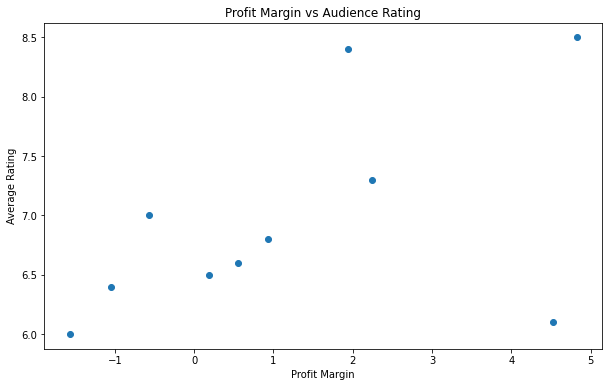

In [16]:
plt.figure(figsize=(10,6))

# Scatter plot: profit margin vs rating
plt.scatter(df['profit_margin'].head(10), df['averagerating'].head(10))

# Labels and title
plt.xlabel('Profit Margin')
plt.ylabel('Average Rating')
plt.title('Profit Margin vs Audience Rating')


plt.show()

PROFIT MARGIN VS AUDIENCE RATING

1. From the table, there are movies that are well received e.g 8.5 ratings that had high profit margin. Although some with low ratings like 6.1 rating get high profit margin despite there weak reception.This shows that finanacial success does not align with what audience love or highly rate.

RECOMMENDATION

1. High rating at low budget 
 Genres like Adventure, Drama, Mystery (rating 7.9, budget $0.5M) and Documentary, Sport (rating 7.7, budget $0.36M) are cost effective hence ideal for the company with limited resources.

2. Moderate budgets with strong ratings are genre like Biography, Family, Sport, Drama, Family, Thriller.
Suggesting real world content matter to the audience. - Hence suitable for sudience rating.


3. Commercial Success in Horror movies
Although horror films receive lower ratings, they stand out as a cost-effective genre due to their low production budgets and high revenue generation,hence,strong profit margins.Making horror a strategic choice when the business objective prioritizes commercial success over the ratings.

Therefore;
 The company will determine whether the primary business objective is for commercial success or audience rating.This decision will guide the choice of genre and level of investment ensuring resources are aligned with the company's resources.

